In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Exercice 1

In [2]:

def calculate_iou(y_true, y_pred):
    """
    Calculate Intersection over Union (IoU)
    
    Args:
        y_true: Ground truth binary mask
        y_pred: Predicted binary mask
        
    Returns:
        IoU score
    """
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true + y_pred) - intersection
    return intersection / (union) 


In [3]:

def calculate_dice(y_true, y_pred):
    """
    Calculate Dice Coefficient
    
    Args:
        y_true: Ground truth binary mask
        y_pred: Predicted binary mask
        
    Returns:
        Dice coefficient
    """
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))


In [4]:

# Example 1: Perfect prediction
y_true_perfect = np.array([[0, 1, 1],
                          [0, 1, 1],
                          [0, 0, 0]])

y_pred_perfect = np.array([[0, 1, 1],
                          [0, 1, 1],
                          [0, 0, 0]])

print("Perfect Prediction:")
print(f"IoU: {calculate_iou(y_true_perfect, y_pred_perfect):.3f}")
print(f"Dice: {calculate_dice(y_true_perfect, y_pred_perfect):.3f}")


Perfect Prediction:
IoU: 1.000
Dice: 1.000


In [5]:

# Example 2: Imperfect prediction
y_true_imperfect = np.array([[0, 1, 1],
                            [0, 1, 1],
                            [0, 0, 0]])

y_pred_imperfect = np.array([[0, 1, 1],
                            [0, 0, 1],
                            [0, 0, 0]])

print("\nImperfect Prediction:")
print(f"IoU: {calculate_iou(y_true_imperfect, y_pred_imperfect):.3f}")
print(f"Dice: {calculate_dice(y_true_imperfect, y_pred_imperfect):.3f}")



Imperfect Prediction:
IoU: 0.750
Dice: 0.857


# Exercice 2

In [6]:
import cv2

In [7]:

def apply_otsu_thresholding(image_path):
    """
    Apply Otsu's thresholding to an image
    
    Args:
        image_path: Path to the input image
        
    Returns:
        tuple: (original grayscale image, binary image, threshold value)
    """
    image = cv2.imread(image_path)
      
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    threshold_value, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return gray, binary, threshold_value


In [8]:

def plot_otsu_results(gray, binary, threshold_value):
    """
    Plot the original grayscale image, its histogram, and the binary result
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.imshow(gray, cmap='gray')
    ax1.set_title('Grayscale Image')
    ax1.axis('off')
    
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    ax2.plot(hist)
    ax2.axvline(x=threshold_value, color='r', linestyle='--', 
                label=f'Threshold = {threshold_value:.1f}')
    ax2.set_title('Histogram with Otsu Threshold')
    ax2.set_xlabel('Pixel Intensity')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    
    ax3.imshow(binary, cmap='gray')
    ax3.set_title('Binary Image')
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()


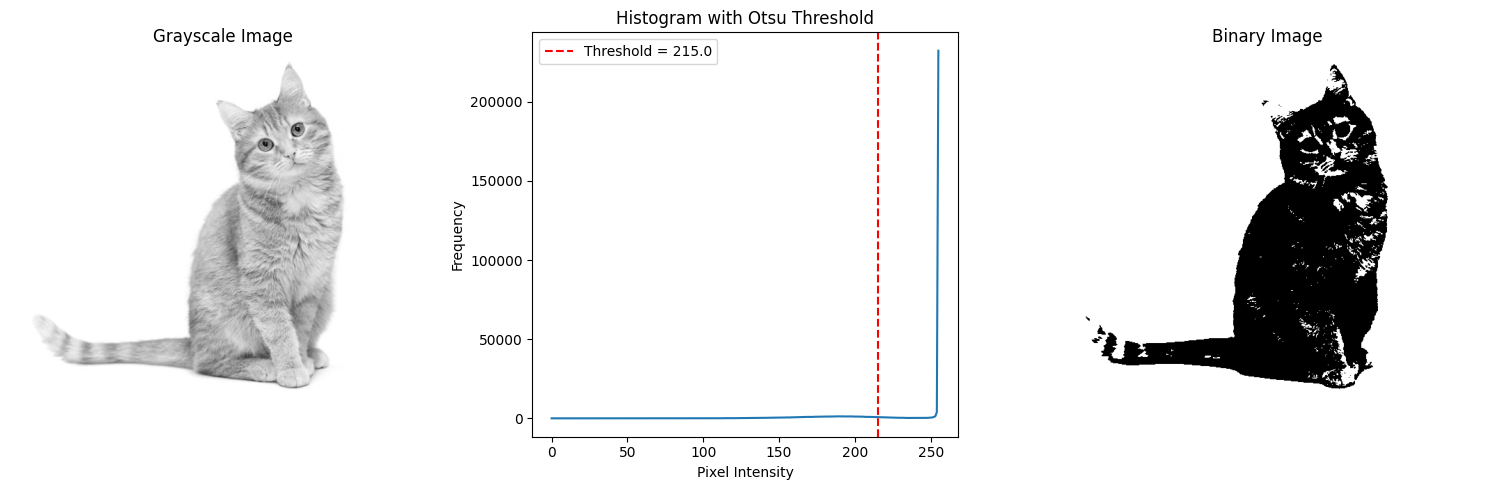

In [10]:

gray, binary, threshold = apply_otsu_thresholding('cat.jpg')
plot_otsu_results(gray, binary, threshold)

# Exercice 3

In [11]:
def apply_sobel_edge_detection(image_path, threshold=40):
    """
    Apply Sobel edge detection to an image
    
    Args:
        image_path: Path to the input image
        threshold: Threshold value for edge detection (default: 100)
        
    Returns:
        tuple: (original grayscale image, gradient magnitude, thresholded edges)
    """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    magnitude = np.uint8(magnitude * 255 / np.max(magnitude))
    
    _, edges = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)
    
    return gray, magnitude, edges


In [12]:

def plot_sobel_results(gray, magnitude, edges):
    """
    Plot the original grayscale image, gradient magnitude, and thresholded edges
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.imshow(gray, cmap='gray')
    ax1.set_title('Grayscale Image')
    ax1.axis('off')
    
    ax2.imshow(magnitude, cmap='gray')
    ax2.set_title('Gradient Magnitude')
    ax2.axis('off')
    
    ax3.imshow(edges, cmap='gray')
    ax3.set_title('Thresholded Edges')
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()


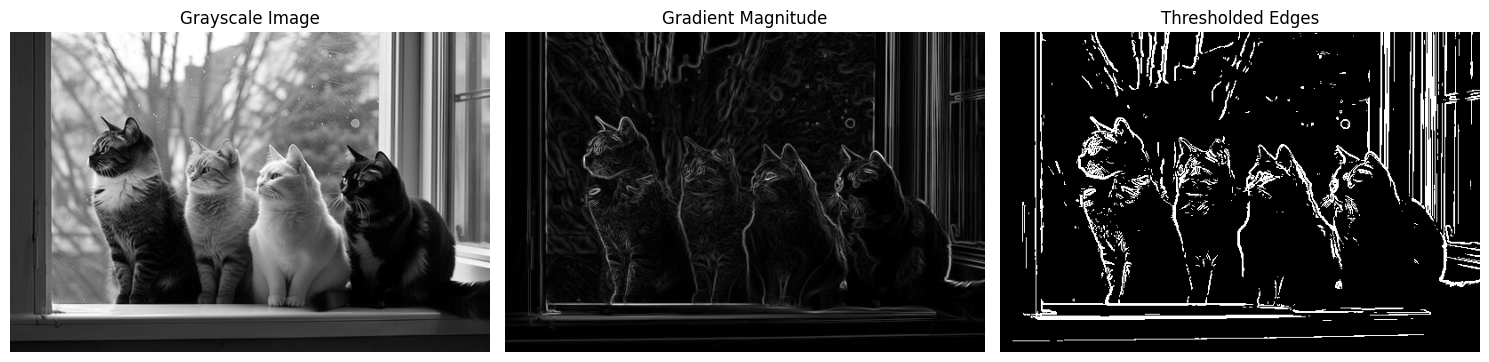

In [13]:

gray, magnitude, edges = apply_sobel_edge_detection('catsbg.jpg')
plot_sobel_results(gray, magnitude, edges)


# Exercice 4

In [14]:
def apply_canny_edge_detection(image_path, low_threshold=100, high_threshold=200, sigma=1):
    """
    Apply Canny edge detection to an image
    
    Args:
        image_path: Path to the input image
        low_threshold: Lower threshold for edge detection
        high_threshold: Higher threshold for edge detection
        sigma: Standard deviation for Gaussian filter
        
    Returns:
        tuple: (original grayscale image, blurred image, edges)
    """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    kernel_size = int(6 * sigma + 1) 
    if kernel_size % 2 == 0:
        kernel_size += 1
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), sigma)
    
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    
    return gray, blurred, edges


In [15]:

def plot_canny_results(gray, blurred, edges):
    """
    Plot the original grayscale image, blurred image, and detected edges
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.imshow(gray, cmap='gray')
    ax1.set_title('Grayscale Image')
    ax1.axis('off')
    
    ax2.imshow(blurred, cmap='gray')
    ax2.set_title('Gaussian Blurred')
    ax2.axis('off')
    
    ax3.imshow(edges, cmap='gray')
    ax3.set_title('Canny Edges')
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()


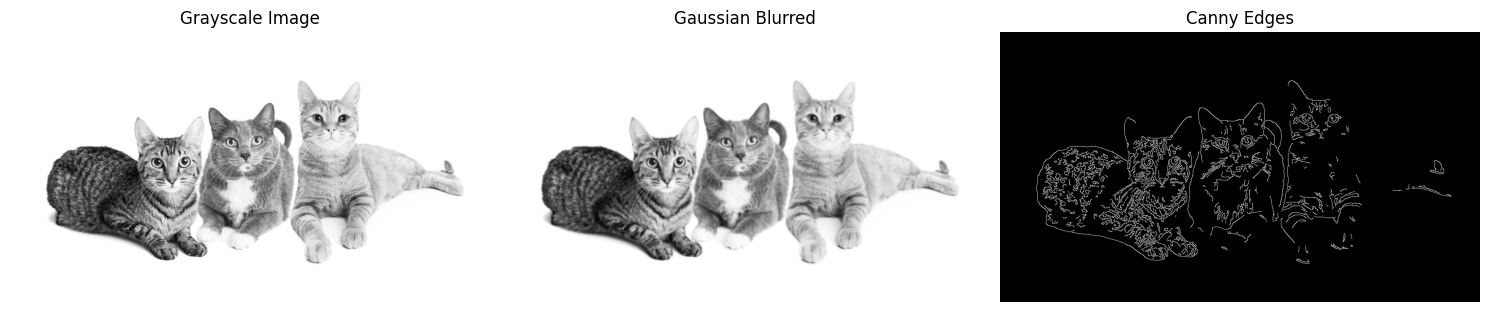

In [16]:

gray, blurred, edges = apply_canny_edge_detection('cats.jpg')
plot_canny_results(gray, blurred, edges)

# Exercice 5

In [17]:
from sklearn.cluster import KMeans

In [18]:

def apply_kmeans_segmentation(image_path, n_clusters=3):
    """
    Apply K-means clustering for image segmentation
    
    Args:
        image_path: Path to the input image
        n_clusters: Number of clusters (segments) to create
        
    Returns:
        tuple: (original image, segmented image)
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_pixels.reshape(image.shape).astype(np.uint8)
    
    return image, segmented_image


In [19]:

def plot_kmeans_results(original, segmented):
    """
    Plot the original image and the segmented result
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.imshow(original)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(segmented)
    ax2.set_title('Segmented Image')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


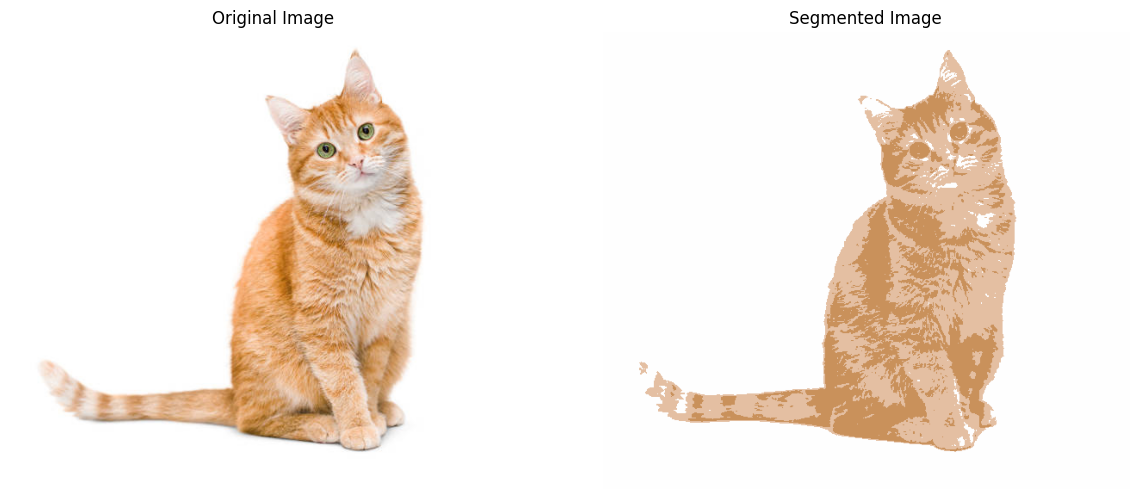

In [20]:

original, segmented = apply_kmeans_segmentation('cat.jpg', n_clusters=3)
plot_kmeans_results(original, segmented)


# Exercice 6

In [21]:
def apply_watershed_segmentation(image_path, threshold=0):
    """
    Apply watershed algorithm for image segmentation
    
    Args:
        image_path: Path to the input image
        threshold: Threshold value for edge detection (default: 0)
    Returns:
        tuple: (original image, segmented image)
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original = image.copy()
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    smoothed = cv2.GaussianBlur(gray, (5, 5), 0)
    
    gradient = cv2.Laplacian(smoothed, cv2.CV_64F)
    gradient = np.uint8(np.absolute(gradient))
    
    _, markers = cv2.threshold(gradient, threshold, 255, cv2.THRESH_BINARY_INV)
    
    markers = cv2.dilate(markers, None, iterations=3)
    
    markers = markers.astype(np.int32)
    
    markers = cv2.watershed(image, markers)
    
    image[markers == -1] = [255, 0, 0]
    
    return original, image


In [22]:

def plot_watershed_results(original, segmented):
    """
    Plot the original image and the watershed segmentation result
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.imshow(original)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(segmented)
    ax2.set_title('Watershed Segmentation')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


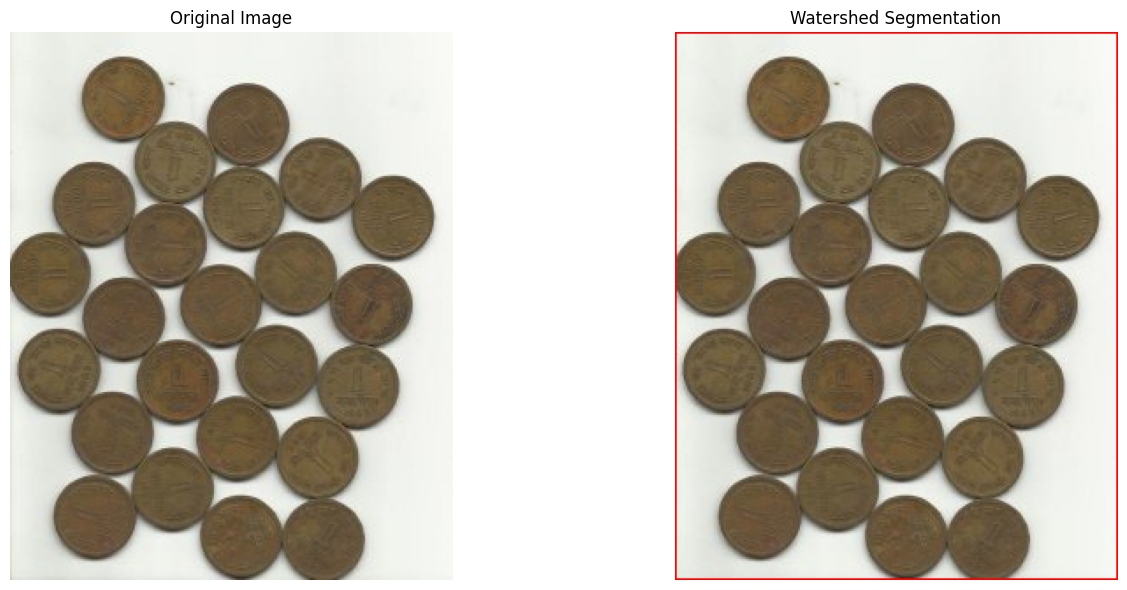

In [23]:

original, segmented = apply_watershed_segmentation('water_coins.jpg', threshold=5)
plot_watershed_results(original, segmented)

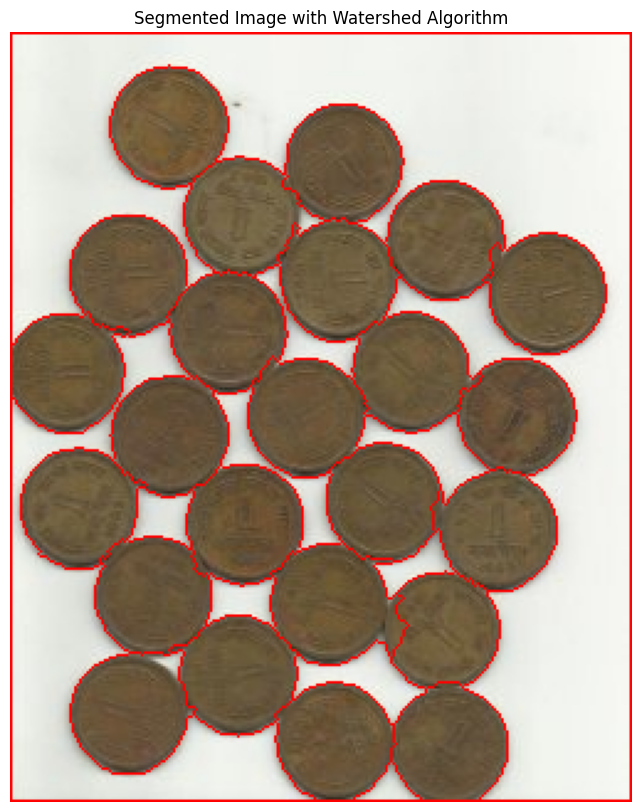

In [24]:
def watershed_segmentation(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or path is incorrect")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to convert the image to binary
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise with morphological opening
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Mark the unknown region with zero
    markers[unknown == 255] = 0

    # Apply the watershed algorithm
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark boundaries in red

    # Display the results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image with Watershed Algorithm')
    plt.axis('off')
    plt.show()

    return image

# Usage example
segmented_image = watershed_segmentation("water_coins.jpg")


# Exercice 7

/Users/alexs/PycharmProjects/MachineLearningForCV/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alexs/PycharmProjects/MachineLearningForCV/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /Users/alexs/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100.0%


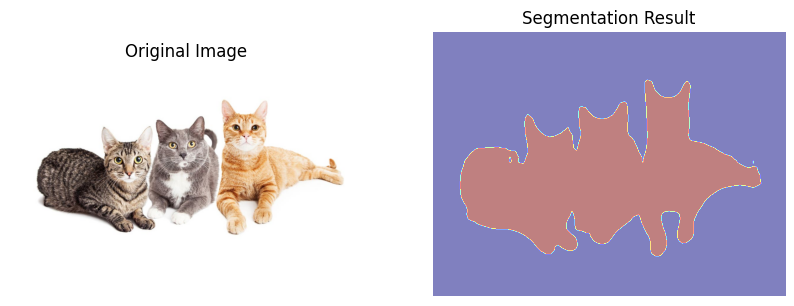

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
import torch
from torchvision import transforms

# Load pre-trained FCN model
model = models.segmentation.fcn_resnet101(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image = cv2.imread('cats.jpg')
image_resized = cv2.resize(image, (640, 480))  # Resize to match the input size
input_tensor = transforms.ToTensor()(image_resized).unsqueeze(0)  # Add batch dimension

# Perform segmentation
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Get the output from the model
    output_predictions = output.argmax(0)  # Get the predicted class for each pixel

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_predictions.cpu().numpy(), cmap='jet', alpha=0.5)
plt.title('Segmentation Result')
plt.axis('off')

plt.show()

# Exercice 8

In [26]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained U-Net model
model = models.segmentation.unet(pretrained=True)
model.eval()

# Load and preprocess the image
image = Image.open('cats.jpg').convert('RGB')
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]  # Get the output
    output_predictions = output.argmax(0)  # Get the class with the highest score

# Display the results
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("U-Net Segmentation")
plt.imshow(output_predictions.cpu().numpy(), cmap='jet')
plt.colorbar()
plt.show()

AttributeError: module 'torchvision.models.segmentation' has no attribute 'unet'

# Exercice 9

/Users/alexs/PycharmProjects/MachineLearningForCV/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alexs/PycharmProjects/MachineLearningForCV/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


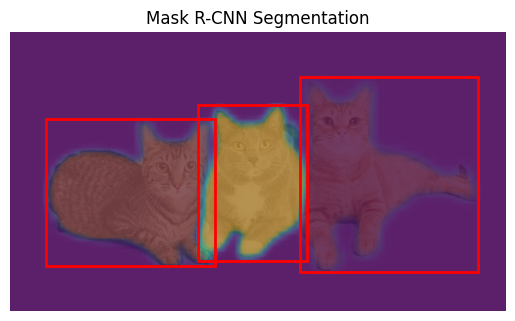

In [34]:
import torch
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Load the pre-trained Mask R-CNN model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
image = Image.open('cats.jpg').convert('RGB')
transform = T.Compose([
    T.ToTensor(),
])
input_tensor = transform(image)  # Convert the image to a tensor

# Perform inference
with torch.no_grad():
    predictions = model([input_tensor])  # Get predictions

# Visualize the results
plt.imshow(image)
ax = plt.gca()

# Draw bounding boxes and masks
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].numpy()
    score = predictions[0]['scores'][i].item()
    mask = predictions[0]['masks'][i, 0].mul(255).byte().numpy()

    if score > 0.5:  # Confidence threshold
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                   fill=False, edgecolor='red', linewidth=2))
        plt.imshow(mask, alpha=0.5)  # Overlay mask

plt.title("Mask R-CNN Segmentation")
plt.axis('off')
plt.show()

# Exercice 10

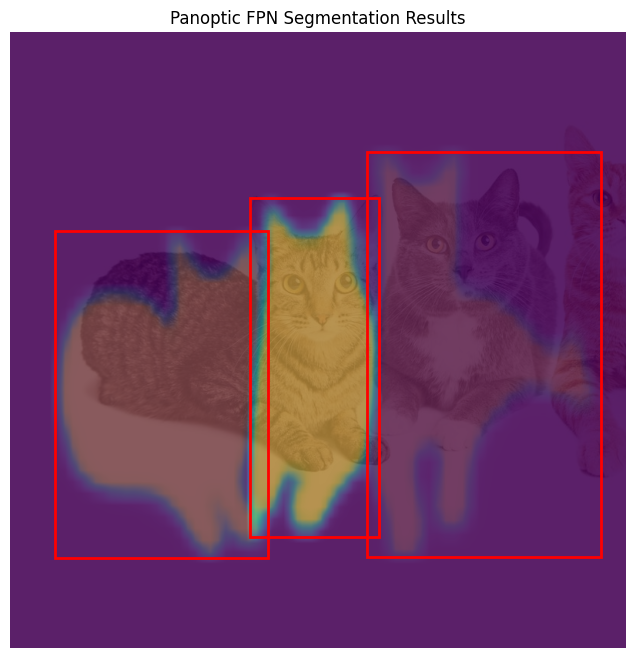

In [28]:
import torch
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained Panoptic FPN model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the input image
input_image = Image.open('cats.jpg').convert("RGB")
transform = T.Compose([
    T.Resize((800, 800)),
    T.ToTensor(),
])
input_tensor = transform(input_image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(input_tensor)

# Visualize the results
plt.figure(figsize=(12, 8))
plt.imshow(input_image)

# Overlay masks and boxes
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i].cpu().numpy()
    score = predictions[0]['scores'][i].cpu().numpy()
    mask = predictions[0]['masks'][i, 0].cpu().numpy()

    if score > 0.5:  # Confidence threshold
        plt.imshow(mask, alpha=0.5)  # Overlay mask
        plt.gca().add_patch(plt.Rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1],
            fill=False, color='red', linewidth=2
        ))

plt.axis('off')
plt.title("Panoptic FPN Segmentation Results")
plt.show()